<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 2</p></tp>
            <tp><p style="font-size:150%;text-align:center">Búsqueda en espacio de estados (1/3) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo <a class="anchor" id="inicio"></a>

Existen varios métodos para la búsqueda de soluciones en un espacio de estados. En este notebook nos enfocaremos en dos estrategias básicas para la búsqueda que **no** usa información sobre el problema (o búsqueda desinformada o a ciegas). Ellas son la búsqueda *primero en anchura* y la búsqueda *primero en profundidad*. Posteriormente complementaremos el proceso de búsqueda con dos consideraciones, a saber, la no repetición de estados y cómo guardar del camino desde el estado inicial hasta el estado objetivo.

Adaptado de (Russell & Norvig, 2020), secciones 3.3.2, 3.3.3, 3.4.1 y 3.4.3.

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Listas](#listas).
* [Estrategia de búsqueda primero en anchura y su implementación en Python](#anchura).
* [Estrategia de búsqueda primero en profundidad y su implementación en Python](#profundidad).
* [Problema de las jarras de agua](#jarras).
* [Evitar redundancias](#redundancias).
* [Estructura de nodos para la búsqueda](#nodos).


## Tipos de listas y acciones <a class="anchor" id="listas"></a>

La información de trabajo en el proceso de búsqueda la almacenaremos en estructuras de datos tipo listas. Sobre estas estructuras de datos podremos realizar los siguientes procedimientos:

* VACIA(*lista*): retorna Verdadero si *lista* está vacía; si no, retorna Falso.
* POP(*lista*): remueve y retorna el primer elemento de *lista*, de acuerdo a lo que *lista* considere que es su primer elemento.
* TOP(*lista*): retorna, pero no remueve, el primer elemento de *lista*.
* ADD(*elemento*, *lista*) inserta *elemento* en el último lugar de *lista*.

Usaremos tres tipos:

**Lista FIFO**

Las siglas corresponden a First-In-First-Out. El primer elemento en ser incluido es el primero en salir. Así pues, la acción POP remueve y retorna el **primer** elemento incluido en la lista. Estas son las listas normales en Python. Note que en Python el método a usar es `lista.pop(0)`.

**Lista LIFO**

Las listas LIFO también se conocen como **pilas**. Las siglas corresponden a Last-In-First-Out. El último elemento en ser incluido es el primero en salir. Así pues, la acción POP remueve y retorna el **último** elemento incluido en la lista. Note que en Python el método a usar es `lista.pop()`.

**Lista prioritaria**

La acción POP remueve y retorna el elemento con el costo mínimo de acuerdo a una función $f$. En el siguiente notebook exploraremos la implementación de este tipo de listas.


## Estrategias de búsqueda

([Volver al inicio](#inicio))

Las estrategias que consideraremos aquí son algunas de las llamadas *estrategias ciegas* o *estrategias desinformadas*, las cuales exploran el espacio de estados de manera sistemática. A este tipo de estrategias se le oponen las llamadas *estrategias informadas* o *heurísticas*, las cuales usan conocimiento específico del problema para buscar soluciones de manera más eficiente. En este notebook y el siguiente nos concentraremos en las estrategias ciegas. En el tercer notebook consideraremos diferentes heurísticas para hacer más eficiente el procedimiento de búsqueda en problemas particulares.

Las dos estrategias ciegas que consideraremos son la *primero en anchura* (o *breadth-first*) y *primero en profundidad* (o *depth-first*). Observe que distintas estrategias tienen asociada una complejidad distinta, la cual también es importante examinar. Además, cada una de ellas tiene ventajas y desventajas sobre las cuales es importante ser consciente.

### Breadth-first search <a class="anchor" id="anchura"></a>

([Volver al inicio](#inicio))

Lo que define a una estrategia de búsqueda de la forma *breadth-first* es que, después de expandir el estado inicial, se expanden primero todos sus hijos antes de expandir cualquier nieto, y así sucesivamente. En otras palabras, se expande la raíz, luego el primer nivel, luego el segundo, etc.

<img src="./imagenes/breath-first search.jpeg" width="400"/>

Usaremos el problema de las ocho reinas para ilustrar el algoritmo. Comenzamos con el estado incial, que es el tablero vacío. Verificamos si este estado satisface la prueba. Claramente el tablero vacío no es un estado objetivo, entonces inicializamos una lista frontera. Para cada elemento de la frontera, vamos removiéndolo y chequeamos sus acciones aplicables. En el ejemplo, removemos el estado inicial y miramos sus acciones aplicables:

<img src="./imagenes/arbol.png" width="400"/>

En el dibujo faltan los otros 61 tableros con una sola reina. Para cada uno de estos tableros, a medida que los consideramos, chequeamos si satisfacen el objetivo. Si no, los incluimos en la frontera. En este caso incluimos todos en la frontera, pues todos tienen solo una reina y necesitamos poner ocho. Cuando acabamos de incluir todo el primer nivel, seguimos con el segundo. Para construir este nivel, retiramos el primer tablero con una reina que encontremos en frontera y consideramos sus acciones aplicables. Por cada una de estas, chequeamos si el tablero con dos reinas obtenido satisface la prueba objetivo, y así continuamos el proceso hasta haber expandido ocho niveles para obtener un tablero con ocho reinas. Puesto que las acciones aplicables no nos permiten incluir una reina que ataque a otras, el primer tablero con ocho reinas que se encuentre en frontera será un estado objetivo y el proceso de búsqueda concluirá.

El siguiente es el pseudocódigo que implementa esta estrategia:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> bread_first_search(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">estado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista FIFO con <font style="font-style: italic;">estado</font> como único elemento <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; <font style="font-style: italic;">problema</font>.transicion(<font style="font-style: italic;">estado</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

Para cargar el ambiente de tarea de las ocho reinas, llamamos la clase desde la libreria `ambientes.py`, la cual contiene el ambiente de tarea definido en el notebook 1. Esta librería la vamos a ir completando a medida que veamos más ejemplos de problemas.

In [71]:
import time

from ambientes import OchoReinas

Definimos también un estado inicial para el cual el algoritmo puede encontrar una solución eficientemente:

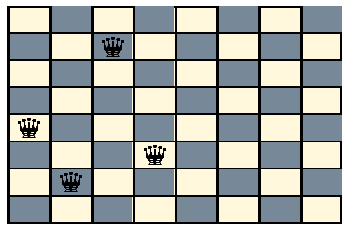

In [46]:
prob = OchoReinas()
s = prob.estado_inicial
s = prob.transicion(s,(0,4))
s = prob.transicion(s,(1,6))
s = prob.transicion(s,(2,1))
s = prob.transicion(s,(3,5))
prob.pintar_estado(s)
prob.estado_inicial = s # Modificamos el estado inicial por defecto del problema

**Ejercicio 1:**

Implemente la función `breadth_first_search` y encuentre una solución para `prob`. 

In [47]:
def bread_first_search(prob, estado):
    
    frontera = [estado]
    
    if prob.test_objetivo(estado):
        return estado
    
    while len(frontera) > 0:
        
        estado = frontera.pop(0)
        
        for accion in prob.acciones_aplicables(estado):
            hijo = prob.transicion(estado, accion)
            
            if prob.test_objetivo(hijo):
                return hijo
            
            frontera.append(hijo)
            
    return False
    

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


<AxesSubplot:>

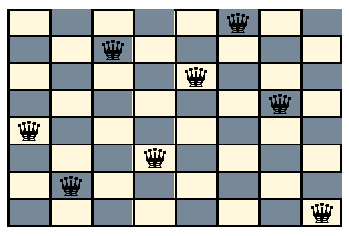

In [48]:
%time

prob.pintar_estado(bread_first_search(prob, s))

La presente estrategia de búsqueda garantiza que, si la solución existe, esta será encontrada en algún momento. Además, se encontrará la solución de menor altura en el árbol.

Las malas noticias es que su complejidad computacional es muy grande. Consideremos primero la siguiente notación:

* Sea $b$ la cantidad máxima de acciones posibles con respecto a cualquier estado. Observe que $b$ corresponde a la cantidad máxima de hijos que se incluirán en la frontera al expandir un estado.

* Sea $d$ la altura del primer estado solución del problema.

Observe que en la primera iteración se generan $b$ hijos a partir del estado inicial, luego $b$ nietos por cada uno de estos primeros $b$ hijos, y así, de tal manera que en la altura $d$ se generan $b^d$ estados. Bajo la convención de medir el tiempo de ejecución del algoritmo solo en términos de la cantidad de estados generados, se tiene que la complejidad de la estrategia `breadth_first_search` es $O(b + b^2 + b^3 + \ldots + b^d) = O(b^d)$.

Si medimos la cantidad de memoria requerida solo en términos de cuántos nodos debemos guardar en un instante dado, entonces debemos considerar que la `frontera` se expande con $b^n$ nodos en en el nivel $n$. Por lo tanto, la complejidad con respecto a la memoria para obtener una solución con altura $d$ es también $O(b^d)$.

La siguiente tabla ilustra muy bien el problema:

<img src="./imagenes/tabla_breadht_first.png" width="500px"/>

Observe que esta estimación determina que, para resolver el problema de las ocho reinas (altura 8) se requerirían 2 minutos y **103 gigabytes** de memoria (el estimado debe ser más alto, toda  vez que la tabla está pensada para un $b$ de 10, mientras que el problema de las ocho reinas tiene un $b$ promedio un poco más alto).

**Ejercicio 2:**

Modifique el estado inicial para tener solo tres reinas y ejecute el procedimiento `breadth_first_search` sobre este nuevo estado inicial. Luego haga la modificación para tener solo dos reinas y ejecute la búsqueda nuevamente. Observe que la cantidad de tiempo requerida es cada vez mayor.

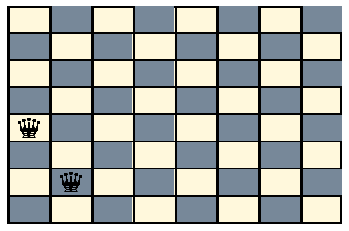

In [59]:
prob = OchoReinas()
s = prob.estado_inicial
s = prob.transicion(s,(0,4))
s = prob.transicion(s,(1,6))
#s = prob.transicion(s,(2,1))
#s = prob.transicion(s,(3,5))
prob.pintar_estado(s)
prob.estado_inicial = s 

4.386380195617676


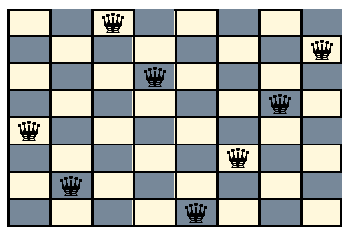

In [60]:
startTime = time.time()
prob.pintar_estado(bread_first_search(prob, s))
endTime = time.time()

print(endTime - startTime)

---

### Depth-first search (Backtracking) <a class="anchor" id="profundidad"></a>

([Volver al inicio](#inicio))

La idea de la estrategia de búsqueda primero en profundidad es expandir el estado más reciente. Cuando se llega a un estado sin acciones aplicables que no satisface la prueba de objetivo, entonces el algoritmo pasa al camino alternativo en el mismo nivel. Este procedimiento se ilustra en la siguiente figura:

<img src="./imagenes/depth-first-search.png" width="400"/>

Esta estrategia utiliza menos memoria que la búsqueda primero en anchura, toda vez que se almacena solo un sucesor de cada estado. Además, puede encontrar la solución más rápidamente sin tener que explorar gran parte del espacio de estados. Esto sucede, no obstante, solo si los estados iniciales seleccionados conducen al estado objetivo. En el peor de los casos, la búsqueda en profundidad deberá explorar todo el espacio de estados (por ejemplo, si el estado objetivo es J en la figura anterior). Lo que es más malo aún, puede quedar atrapada en caminos cíclicos o seguir expandiendo un camino infinito.

Un pseudocódigo para el procedimiento recursivo de búsqueda en profundidad es el siguiente:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> backtracking_search(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">estado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; <font style="font-style: italic;">problema</font>.transicion(<font style="font-style: italic;">estado</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">resultado</font> &#8592; backtracking_search(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">hijo</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">resultado</font> <font style="font-weight: bold;" color = "red">no es</font> falla <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">resultado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>



**Ejercicio 3:**

Implemente la función `backtracking_search` y encuentre una solución para el siguiente `prob`.

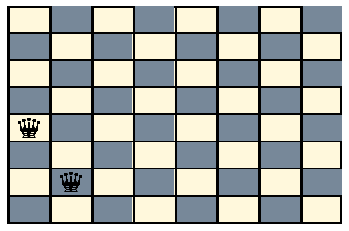

In [56]:
prob = OchoReinas()
s = prob.estado_inicial
s = prob.transicion(s,(0,4))
s = prob.transicion(s,(1,6))
prob.pintar_estado(s)
prob.estado_inicial = s

In [72]:
def backtracking_search(prob, estado):
    
    if prob.test_objetivo(estado):
        return estado
    
    for accion in prob.acciones_aplicables(estado):
        hijo = prob.transicion(estado, accion)
        resu = backtracking_search(prob, hijo)
        
        if resu != 'False':
            return resu
    
    return 'False'

/tmp/ipykernel_5943/1940819512.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if resu != 'False':


1.5800839185714721


<AxesSubplot:>

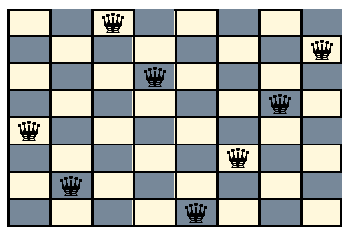

In [74]:
intentos = 30
times = []

for i in range(intentos): 
    
    startTime = time.time()
    a = backtracking_search(prob, s)
    endTime = time.time()
    
    times.append(endTime - startTime)

print(sum(times) / len(times))
prob.pintar_estado(a)

---

## Problema de las jarras de agua <a class="anchor" id="jarras"></a>

([Volver al inicio](#inicio))

Este es un problema de razonamiento sobre el uso de dos jarras de agua sin marcas, pero con capacidad conocida, para obtener una cantidad solicitada. Suponga que usted cuenta con dos jarras de agua, una de tres litros y otra de cuatro, y que también cuenta con acceso a una llave de agua para llenar las jarras. ¿Cómo puede obtener exáctamente dos litros de agua en la jarra de cuatro litros?

Este problema se puede formalizar de la siguiente manera. En primer lugar, representamos la situación de las jarras mediante una pareja ordenada $(x,y)$, donde el número de la izquierda corresponde a la cantidad de agua en la jarra de cuatro litros y el de la derecha a la cantidad de agua en la de tres.

* **Estado inicial**: Las dos jarras vacías, que representaremos como $(0,0)$. 

* **Posibles acciones**: Tenemos las siguientes acciones:

1. Si $x<4$, llenar la jarra de cuatro litros.
2. Si $y<3$, llenar la jarra de tres litros.
3. Si $x>0$, vaciar la jarra de cuatro litros en el suelo.
4. Si $y>0$, vaciar la jarra de tres litros en el suelo.
5. Si $x>0$, verter el contenido de la jarra de cuatro litros en la jarra de tres litros hasta llenarla o que la primera quede vacía.
6. Si $y>0$, verter el contenido de la jarra de tres litros en la jarra de cuatro litros hasta llenarla o que la primera quede vacía.

* **Función de transiciones**: El resultado de cada acción se puede describir mediante la modificación de los estados:

1. $(x,y)\to (4,y)$
2. $(x,y)\to (x,3)$
3. $(x,y)\to (0,y)$
4. $(x,y)\to (x,0)$
5. $(x,y)\to (x-d,y+d)$ donde $d=\begin{cases}x,&\mbox{si }y+x\leq 3\\ 3-y,&\mbox{si }y+x>3\end{cases}$
6. $(x,y)\to (x+d,y-d)$ donde $d=\begin{cases}y,&\mbox{si }x+y\leq 4\\ 4-x,&\mbox{si }x+y>4\end{cases}$


* **Prueba de satisfacción del objetivo**: Nos sirve cualquier estado de la forma $(2,y)$.

* **Función de costo**: Vamos a asumir que cada acción tiene el mismo costo. Más adelante vamos a modificar esta suposición. 

Cargamos desde la librería `ambientes.py` la implementación en Python de este problema:

In [75]:
from ambientes import JarrasAgua

<AxesSubplot:>

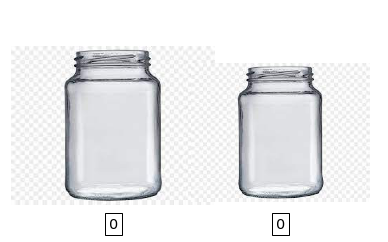

In [77]:
prob = JarrasAgua()
s = prob.estado_inicial
prob.pintar_estado(s)

Mediante este problema vamos a ilustrar dos modificaciones importantes que debemos incluir en nuestros algoritmos de búsqueda, a saber, la eliminación de redundancias y la consecución del camino solución, que va desde el estado inicial hasta el estado objetivo encontrado.

## Eliminación de redundancias <a class="anchor" id="redundancias"></a>

([Volver al inicio](#inicio))

En el problema de las jarras de agua aparecen muchas redundancias. Por ejemplo, podemos llenar la jarra de 4, luego verter su contenido en la jarra de 3 y, finalmente, verter el contenido de esta última en la primera:

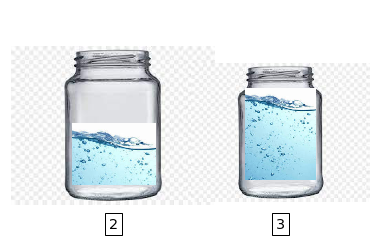

In [78]:
prob = JarrasAgua()
s = prob.estado_inicial
acciones = [1, 5, 4, 5, 1, 5]
for a in acciones:
    prob.pintar_transicion(s,a)
    s = prob.transicion(s,a)

La existencia de ciclos en las relaciones entre estados pone un problema importante para la búsqueda primero en profundidad recursiva. En efecto, el algoritmo puede quedarse atascado al seguir un camino cíclico, como el que acabamos de ilustrar.

Observe que al correr el procedimiento `backtracking_search` sobre el problema de las jarras de agua obtenemos el error `maximum recursion depth exceeded in comparison`:

In [79]:
prob = JarrasAgua()
s = prob.estado_inicial
l = backtracking_search(prob,s)
if l is not None:
    print('La solución encontrada es:')
    prob.pintar_estado(l)
else:
    print('No se encontró una solución!')

RecursionError: maximum recursion depth exceeded in comparison

Este error se produce porque Python pone un límite a la creación de objetos recursivos. Este límite lo excedió el algoritmo anterior probablemente porque entró en un ciclo.

Para evitar los ciclos, es necesario llevar la cuenta de los estados que ya se han recorrido. Esto lo haremos mediante una lista en la que incluyamos los estados que ya hemos considerado. El precio a pagar es que no podemos usar un procedimiento recursivo. La buena noticia es que podemos adaptar fácilmente el procedimiento que usamos para buscar primero en anchura, pero esta vez para buscar primero en profundidad. Esta vez, lo que hacemos es considerar el último estado que fue incluido en la frontera. Con esto nos aseguramos que el proceso comienza a explorar en profundidad.

El pseudocódigo para esta estrategia es el siguiente. Los dos aspectos importantes a tener en cuenta son los siguientes. *frontera* es una lista LIFO (o pila) y hemos incluido la lista *explorados*:

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> depth_first_search(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; <font style="font-style: italic;">problema</font>.estado_inicial <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">estado</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista LIFO con <font style="font-style: italic;">estado</font> como único elemento <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">explorados</font> &#8592; lista FIFO vacía <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">estado</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">estado</font>, <font style="font-style: italic;">explorados</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">estado</font>) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; <font style="font-style: italic;">problema</font>.transicion(<font style="font-style: italic;">estado</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">hijo</font> <font style="font-weight: bold;" color = "red"> not in </font> <font style="font-style: italic;">explorados</font> <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

**Ejercicio 4:**

Implemente el procedimiento `depth_first_search` y utilícelo para resolver el procedimiento de las jarras.

In [88]:
def depth_first_search(prob):
    
    estado = prob.estado_inicial
    
    if prob.test_objetivo(estado):
        return estado
    
    frontera = [estado]
    explo = []
    
    while len(frontera) > 0:
        
        estado = frontera.pop(0)
        explo.append(estado)
        
        for accion in prob.acciones_aplicables(estado):
            hijo = prob.transicion(estado, accion)
            
            if prob.test_objetivo(hijo):
                return hijo
            
            if hijo not in explo:
                frontera.append(hijo)
            
    return False

La solución encontrada es:


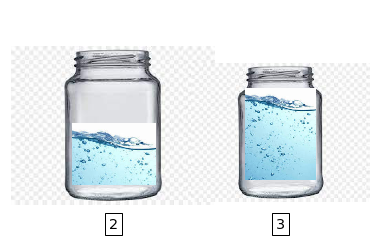

In [91]:
prob = JarrasAgua()
s = prob.estado_inicial
l = depth_first_search(prob)
if l is not None:
    print('La solución encontrada es:')
    prob.pintar_estado(l)
else:
    print('No se encontró una solución!')
    
#prob.pintar_estado(depth_first_search(prob))

---

## Estructura de nodos para la búsqueda <a class="anchor" id="nodos"></a>

([Volver al inicio](#inicio))

El resultado del ejercicio anterior nos debió mostrar un estado en el cual hay dos litros de agua en la jarra de 4 litros. Esto está muy bien. Pero, ¿cómo se logró esto? Es claro que la solución de nuestro problema no es un estado, sino el camino de acciones que se deben seguir para pasar del estado inicial al estado objetivo. Necesitamos, entonces, una estructura de datos para guardar dicho camino.

Lo que vamos a hacer es construir un árbol a medida que realizamos nuestro procedimiento de búsqueda. Este árbol estará compuesto de nodos que representan estados, pero también tendrán atributos que nos permitirán saber quién es su antecesor, qué acción se usó para construirlo, y cuál es el costo acumulado para obtenerlo. También guardarán la codificación del estado que representan, pero sobre esto volveremos más adelante.

La clase en Python que nos permite crear árboles de búsqueda es la siguiente:

In [105]:
class Nodo:
    
    # Clase para crear los nodos
    
    def __init__(self, estado, madre, accion, costo_camino, codigo):
        self.estado = estado
        self.madre = madre
        self.accion = accion
        self.costo_camino = costo_camino
        self.codigo = codigo
        
def nodo_hijo(problema, madre, accion):
    
    # Función para crear un nuevo nodo
    # Input: problema, que es un objeto de clase ocho_reinas
    #        madre, que es un nodo,
    #        accion, que es una acción que da lugar al estado del nuevo nodo
    # Output: nodo
    
    estado = problema.transicion(madre.estado, accion)
    costo_camino = madre.costo_camino + problema.costo(madre.estado, accion)
    codigo = problema.codigo(estado)
    return Nodo(estado, madre, accion, costo_camino, codigo)

Vamos a ilustrar la creación de un árbol de búsqueda mediante un ejemplo. Puede correr la siguiente celda varias veces, pues contiene un método de selección aleatorio para las dos acciones a ejecutar:

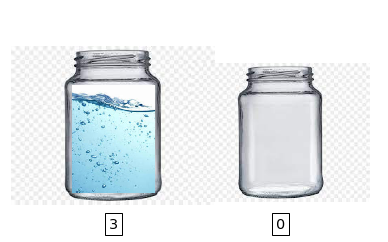

In [106]:
from random import choice

# Ejemplo de creación de un nodo a partir de la raíz
raiz = Nodo(prob.estado_inicial, None, None, 0, prob.codigo(prob.estado_inicial))
camino = []
acciones = prob.acciones_aplicables(raiz.estado)
a = choice(acciones)
camino.append(a)
n1 = nodo_hijo(prob, raiz, a)
acciones = prob.acciones_aplicables(n1.estado)
a = choice(acciones)
camino.append(a)
n2 = nodo_hijo(prob, n1, a)
s = raiz.estado
for a in camino:
    prob.pintar_transicion(s,a)
    s = prob.transicion(s,a)

En el ejemplo anterior se crearon tres nodos: `n`, `n1` y `n2`. Observe que `n2` nos puede decir quién es su madre (`n1`) y con cuál acción fue creado. A su vez, `n1` nos puede dar la misma información, y con esto llegamos a la raiz (que representa el estado inicial):

In [107]:
print("="*10, "Información de n2" + "="*10)
print("Codigo de n2:", n2.codigo)
print("Madre de n2:", n2.madre)
print("Codigo de madre de n2:", n2.madre.codigo)
print("Acción para crear n2:", n2.accion)
print("")
print("="*10, "Información de n1" + "="*10)
print("Codigo de n1:", n1.codigo)
print("Madre de n1:", n1.madre)
print("Codigo de madre de n1:", n1.madre.codigo)
print("Acción para crear n1:", n1.accion)

========== Información de n2==========
Codigo de n2: 3-0
Madre de n2: <__main__.Nodo object at 0x7f5bf4ac0610>
Codigo de madre de n2: 0-3
Acción para crear n2: 6

========== Información de n1==========
Codigo de n1: 0-3
Madre de n1: <__main__.Nodo object at 0x7f5bf4ab4e80>
Codigo de madre de n1: 0-0
Acción para crear n1: 2


Aquí podemos ver las acciones que van desde la raíz (`n`) hasta `n2`. Esto nos permite ver que, cuando encontremos el nodo que representa un estado objetivo, tenemos toda la información requerida para encontrar el camino solución.

Finalmente, observe que el código de un estado nos permite visualizarlo fácilmente. Además, nos permitirá liberar memoria a la hora de generar la lista *explorados*, toda vez que solo almacenaremos códigos, no objetos completos. Adicionalmente, nos permite evitar problemas a la hora de chequear si un estado está en *explorados*, puesto que Python no funciona muy bien a la hora de revisar si un objeto está en una lista de objetos. Lo que haremos será revisar si el código de un estado está en una lista de códigos de los estados que ya hemos explorado.

**Ejercicio 5:**

Implemente una función que, dado un nodo `n`, permita obtener el camino de generación de `n` a partir del estado inicial. Confirme su código corriendo la función sobre `n2` y verificando las acciones que lo generaron.

In [110]:
def camino(nodo):
    
    if nodo == raiz:
        return []
    
    else:
        return camino(nodo.madre) + [n.accion]

---

Ya podemos poner toda la carne sobre el asador. En efecto, podemos implementar las búsquedas primero en anchura y primero en profundidad evitando caminos repetidos, usando una estructura de árbol para guardar el camino de acciones que generan a cada nodo, y usamos códigos en lugar de objetos en la lista *explordos* para liberar memoria.

Los pseudocódigos de estos procedimientos son los siguientes:

**Depth-first search**

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> depth_first_search(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">problema</font>.estado_inicial) <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista LIFO con <font style="font-style: italic;">nodo</font> como único elemento <br>
&nbsp;&nbsp; <font style="font-style: italic;">explorados</font> &#8592; lista FIFO vacía <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br> 
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">nodo</font>.codigo, <font style="font-style: italic;">explorados</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; nodo_hijo(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">hijo</font>.codigo <font style="font-weight: bold;" color = "red">not in</font> <font style="font-style: italic;">explorados</font> <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>

**Breadth-first search**

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
<font style="font-weight: bold;" color = "red">function</font> breadth_first_search(<font style="font-style: italic;">problema</font>) <font style="font-weight: bold;" color = "red">returns</font> solución o falla <br>
&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; NODO(<font style="font-style: italic;">problema</font>.estado_inicial) <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">nodo</font> <br>
&nbsp;&nbsp; <font style="font-style: italic;">frontera</font> &#8592; lista FIFO con <font style="font-style: italic;">nodo</font> como único elemento <br>
&nbsp;&nbsp; <font style="font-style: italic;">explorados</font> &#8592; lista FIFO vacía <br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">While not</font> VACIA(<font style="font-style: italic;">frontera</font>) <font style="font-weight: bold;" color = "red">do</font> <br> 
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">nodo</font> &#8592; POP(<font style="font-style: italic;">frontera</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">nodo</font>.codigo, <font style="font-style: italic;">explorados</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">for each</font> <font style="font-style: italic;">accion</font> <font style="font-weight: bold;" color = "red">in</font> <font style="font-style: italic;">problema</font>.acciones_aplicables(<font style="font-style: italic;">nodo</font>.estado) <font style="font-weight: bold;" color = "red">do</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-style: italic;">hijo</font> &#8592; nodo_hijo(<font style="font-style: italic;">problema</font>, <font style="font-style: italic;">nodo</font>, <font style="font-style: italic;">accion</font>) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">problema</font>.test_objetivo(<font style="font-style: italic;">hijo</font>.estado) <font style="font-weight: bold;" color = "red">then return</font> <font style="font-style: italic;">hijo</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">if</font> <font style="font-style: italic;">hijo</font>.codigo <font style="font-weight: bold;" color = "red">not in</font> <font style="font-style: italic;">explorados</font> <font style="font-weight: bold;" color = "red">then</font> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ADD(<font style="font-style: italic;">hijo</font>, <font style="font-style: italic;">frontera</font>)<br>
&nbsp;&nbsp; <font style="font-weight: bold;" color = "red">return</font> falla <br>
</div>


**Ejercicio 6:**

Implemente ambos pseudocódigos y resuelva el problema de las jarras con cada uno de ellos. ¿Cuál procedimiento funciona mejor para este problema?

---

## En este notebook usted aprendió

* Cómo realizar una búsqueda mediante los métodos *breadth-first* y *depth-first* e implementarlos en python.